In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

MovieMetadata_df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None)

CharacterMetadata_df = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None)

# Define column headers as a list
MovieMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
]

MovieMetadata_df.columns = MovieMetadata_df_headers

# Define column headers for the second dataset
CharacterMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

CharacterMetadata_df.columns = CharacterMetadata_df_headers

# Text data 
names_df = pd.read_csv('MovieSummaries/name.clusters.txt', sep="\t", header=None)
plot_summaries_df = pd.read_csv('MovieSummaries/plot_summaries.txt', sep="\t", header=None)
tvTropes_df = pd.read_csv('MovieSummaries/tvtropes.clusters.txt', sep="\t", header=None)

names_df_headers = [
    'Character Names',
    'Instances'
]

names_df.columns = names_df_headers

tvTropes_df_headers = [
    'Character Types',
    'Instances'
]

tvTropes_df.columns = tvTropes_df_headers

plot_summaries_df_headers = [
    'Wikipedia movie ID',
    'Summaries'
]

plot_summaries_df.columns = plot_summaries_df_headers

import ast
MovieMetadata_df['Country dictionnaire'] = MovieMetadata_df['Movie countries (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Genre dictionnaire'] = MovieMetadata_df['Movie genres (Freebase ID:name tuples)'].apply(ast.literal_eval)
MovieMetadata_df['Language dictionnaire'] = MovieMetadata_df['Movie languages (Freebase ID:name tuples)'].apply(ast.literal_eval)


In [156]:
print(tvTropes_df.head(5))
print(names_df.head(5))

           Character Types                                          Instances
0  absent_minded_professor  {"char": "Professor Philip Brainard", "movie":...
1  absent_minded_professor  {"char": "Professor Keenbean", "movie": "Richi...
2  absent_minded_professor  {"char": "Dr. Reinhardt Lane", "movie": "The S...
3  absent_minded_professor  {"char": "Dr. Harold Medford", "movie": "Them!...
4  absent_minded_professor  {"char": "Daniel Jackson", "movie": "Stargate"...
  Character Names  Instances
0   Stuart Little  /m/0k3w9c
1   Stuart Little  /m/0k3wcx
2   Stuart Little  /m/0k3wbn
3        John Doe  /m/0jyg35
4        John Doe  /m/0k2_zn


### Nombre de films par pays:

In [157]:
countries_counts = Counter()

for country_dict in MovieMetadata_df['Country dictionnaire']:
    countries_counts.update(country_dict.values())

countries_counts = sorted(countries_counts.items(), key=lambda x: x[1], reverse= True)

print("Nombre de films par pays:")
display(countries_counts)

Nombre de films par pays:


[('United States of America', 34408),
 ('India', 8411),
 ('United Kingdom', 7868),
 ('France', 4395),
 ('Italy', 3163),
 ('Japan', 2647),
 ('Canada', 2534),
 ('Germany', 2393),
 ('Argentina', 1468),
 ('Hong Kong', 1240),
 ('Spain', 1136),
 ('Australia', 1114),
 ('South Korea', 887),
 ('Mexico', 870),
 ('Netherlands', 840),
 ('Sweden', 657),
 ('West Germany', 647),
 ('China', 645),
 ('Denmark', 610),
 ('Soviet Union', 564),
 ('Philippines', 389),
 ('Poland', 382),
 ('Czechoslovakia', 376),
 ('Belgium', 360),
 ('New Zealand', 355),
 ('Norway', 345),
 ('Russia', 345),
 ('Hungary', 325),
 ('German Democratic Republic', 322),
 ('Yugoslavia', 306),
 ('Brazil', 298),
 ('Ireland', 287),
 ('Switzerland', 280),
 ('Austria', 267),
 ('Finland', 247),
 ('Czech Republic', 240),
 ('Israel', 235),
 ('Turkey', 215),
 ('England', 211),
 ('Iran', 209),
 ('Thailand', 208),
 ('South Africa', 200),
 ('Greece', 192),
 ('Pakistan', 189),
 ('Taiwan', 176),
 ('Portugal', 167),
 ('Croatia', 155),
 ('Egypt', 153)

### Nombre de films par genre: 

In [158]:
genre_counts = Counter()

for genre_dict in MovieMetadata_df['Genre dictionnaire']:
    genre_counts.update(genre_dict.values())

genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse= True)

print("Nombre de films par pays:")
display(genre_counts)

Nombre de films par pays:


[('Drama', 34007),
 ('Comedy', 16349),
 ('Romance Film', 10234),
 ('Black-and-white', 9094),
 ('Action', 8798),
 ('Thriller', 8744),
 ('Short Film', 8141),
 ('World cinema', 7155),
 ('Crime Fiction', 6948),
 ('Indie', 6897),
 ('Documentary', 5630),
 ('Horror', 5280),
 ('Silent film', 5250),
 ('Adventure', 4963),
 ('Family Film', 4598),
 ('Action/Adventure', 4561),
 ('Comedy film', 4362),
 ('Musical', 4160),
 ('Animation', 3534),
 ('Romantic drama', 3372),
 ('Mystery', 3195),
 ('Science Fiction', 3052),
 ('Fantasy', 2820),
 ('Romantic comedy', 2680),
 ('War film', 2652),
 ('Japanese Movies', 2322),
 ('Western', 2226),
 ('Crime Thriller', 2122),
 ('Period piece', 1758),
 ('Comedy-drama', 1720),
 ('Film adaptation', 1531),
 ('Chinese Movies', 1525),
 ('Biography', 1392),
 ('Psychological thriller', 1331),
 ('Bollywood', 1321),
 ('Sports', 1206),
 ('Biographical film', 1198),
 ('LGBT', 1163),
 ('Music', 1088),
 ('Family Drama', 1043),
 ('Black comedy', 1025),
 ('Parody', 999),
 ('Televisio

In [159]:
# Function to extract the year
def extract_year(date_str):
    if pd.isna(date_str):  # Check if the value is NaN
        return None  # Return None or a suitable placeholder for NaN
    if len(date_str) == 4:  # Check if it's a four-digit year
        return int(date_str)  # Return the year as an integer
    return pd.to_datetime(date_str, errors='coerce').year  # Convert to datetime and extract year


# Extract the year without modifying the original column
MovieMetadata_df['Year'] = MovieMetadata_df['Movie release date'].apply(extract_year)
MovieMetadata_df['Year'] = MovieMetadata_df['Year'].apply(lambda x: int(x) if pd.notna(x) else x)


In [160]:
print(plot_summaries_df.shape)

#Jointure tableau principal des films/summaries 
MovieMetadata_df_1 = pd.merge(MovieMetadata_df, plot_summaries_df, on = "Wikipedia movie ID", how="inner")

print(MovieMetadata_df_1.shape)

(42303, 2)
(42204, 14)


### Sélection des films sur l'espace: A améliorer, comment créer un modèle qui détermine si un film parle d'espace ou non ? 

In [161]:
substrings = ['Space', 'space', 'astronaut', 'Moon', 'moon', 'rocket', 'NASA', 'galaxy', 'planets', 'Apollo', 'black hole', 'gravity', 
              'alien', 'Race Space', 'Spoutnik', 'spaceship', 'light year']

pattern = '|'.join(substrings)

space_movies = MovieMetadata_df_1[MovieMetadata_df_1['Summaries'].str.contains(pattern, case=False, na=False)]

print(space_movies.shape)


(3094, 14)


In [162]:
test= space_movies[space_movies['Summaries'].str.contains('black hole', case=False, na=False)]
print(test.shape)
print(test.head(5))

(38, 14)
      Wikipedia movie ID Freebase movie ID           Movie name  \
1                9363483        /m/0285_cd     White Of The Eye   
3037              805941         /m/03dd0s  The Deadly Assassin   
3060              565318         /m/02qlp4        Lost in Space   
5220            32427935        /m/0gyszqb        Ultraman Saga   
5423             8066735        /m/026q7m6        Cosmic Voyage   

     Movie release date  Movie box office revenue  Movie runtime  \
1                  1987                       NaN          110.0   
3037               1976                       NaN           95.0   
3060         1998-04-03               136159423.0          130.0   
5220            2012-02                       NaN           90.0   
5423               1996                       NaN           35.0   

     Movie languages (Freebase ID:name tuples)  \
1           {"/m/02h40lc": "English Language"}   
3037                                        {}   
3060        {"/m/02h40lc": "E

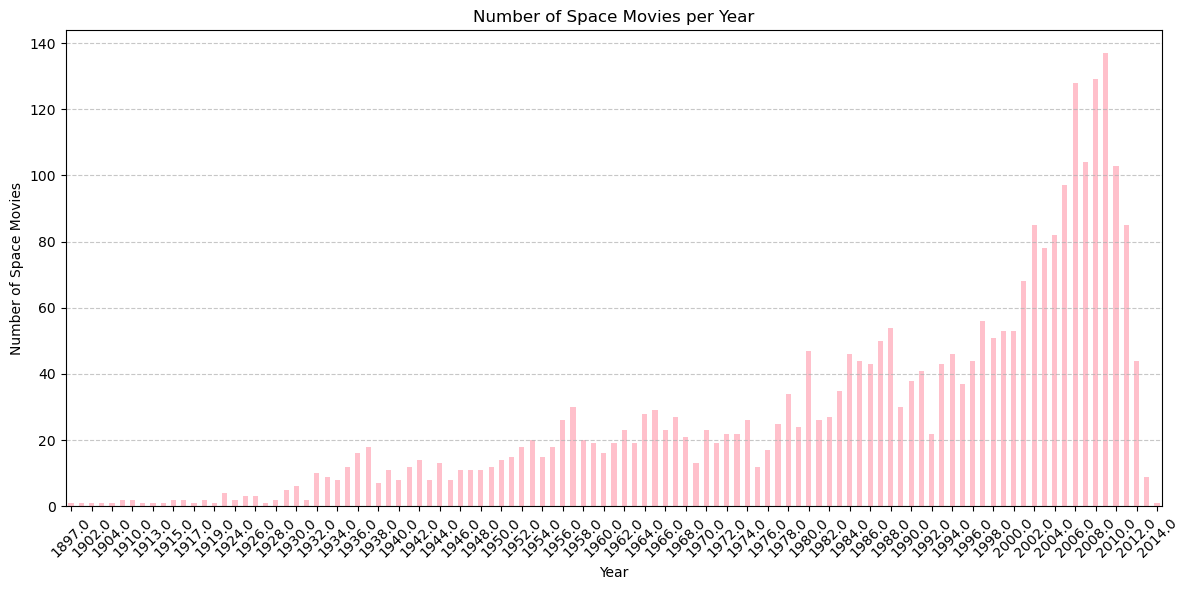

In [163]:
space_movies_per_year =space_movies['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
space_movies_per_year.plot(kind='bar', color='pink')
plt.title('Number of Space Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Space Movies')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Course à l'espace: 1957-1975

Pic en 1957 --> Spoutnik 1, premier satellite artificiel placé en orbite par l'URSS 

le nombre de films sur l'espace augmente à partir des années 1950. 
Explosion du nombre de films sur l'espace au début des années 2000 avec le développement des effets spéciaux. 


### Nombre de films sur l'espace par pays: 

In [164]:
countries_counts_space = Counter()

for country_dict in space_movies['Country dictionnaire']:
    countries_counts_space.update(country_dict.values())

countries_counts_space = sorted(countries_counts_space.items(), key=lambda x: x[1], reverse= True)


print("Nombre de films par pays:")
display(countries_counts_space)

Nombre de films par pays:


[('United States of America', 1919),
 ('United Kingdom', 307),
 ('Japan', 233),
 ('India', 152),
 ('France', 131),
 ('Canada', 127),
 ('Germany', 98),
 ('Italy', 65),
 ('Australia', 59),
 ('Hong Kong', 46),
 ('Spain', 44),
 ('South Korea', 37),
 ('New Zealand', 23),
 ('China', 20),
 ('Soviet Union', 17),
 ('Argentina', 13),
 ('Netherlands', 13),
 ('South Africa', 12),
 ('Philippines', 12),
 ('Mexico', 12),
 ('West Germany', 11),
 ('Belgium', 11),
 ('Russia', 11),
 ('Ireland', 10),
 ('England', 10),
 ('Thailand', 10),
 ('Switzerland', 10),
 ('Israel', 9),
 ('Poland', 8),
 ('Sweden', 8),
 ('Turkey', 8),
 ('Czech Republic', 7),
 ('Denmark', 7),
 ('Brazil', 6),
 ('Taiwan', 6),
 ('Luxembourg', 5),
 ('Yugoslavia', 5),
 ('Finland', 5),
 ('Norway', 5),
 ('Czechoslovakia', 5),
 ('Chile', 4),
 ('Malaysia', 4),
 ('Romania', 4),
 ('Austria', 4),
 ('Greece', 4),
 ('Hungary', 4),
 ('Weimar Republic', 3),
 ('Indonesia', 3),
 ('Iran', 3),
 ('Bulgaria', 3),
 ('Singapore', 3),
 ('Peru', 2),
 ('Pakistan'

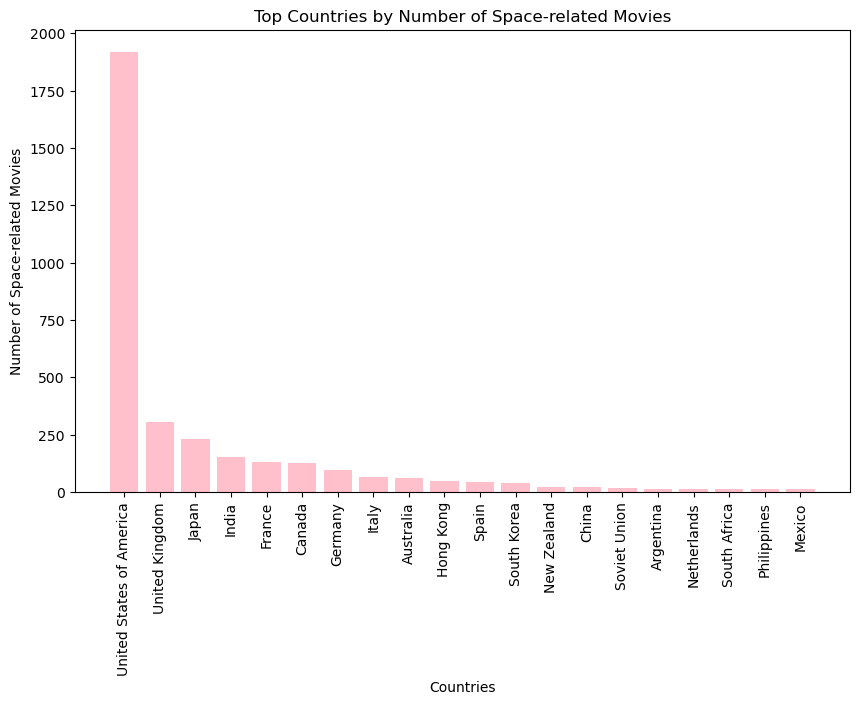

In [165]:
countries, counts = zip(*countries_counts_space)

top_n = 20
countries = countries[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color='pink')
plt.xlabel("Countries")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Countries by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

### Genre des films sur l'espace: 

In [166]:
genre_counts_space = Counter()

for genre_dict in space_movies['Genre dictionnaire']:
    genre_counts_space.update(genre_dict.values())

genre_counts_space = sorted(genre_counts_space.items(), key=lambda x: x[1], reverse= True)
display(genre_counts_space)

[('Drama', 968),
 ('Science Fiction', 924),
 ('Comedy', 891),
 ('Action', 601),
 ('Adventure', 542),
 ('Thriller', 528),
 ('Horror', 456),
 ('Animation', 402),
 ('Family Film', 400),
 ('Romance Film', 394),
 ('Fantasy', 351),
 ('Action/Adventure', 341),
 ('World cinema', 309),
 ('Short Film', 254),
 ('Indie', 236),
 ('Black-and-white', 210),
 ('Japanese Movies', 203),
 ('Crime Fiction', 183),
 ('Musical', 169),
 ('Romantic comedy', 150),
 ('Mystery', 145),
 ('Romantic drama', 129),
 ("Children's/Family", 116),
 ('Parody', 114),
 ('Comedy film', 105),
 ('Film adaptation', 105),
 ('Cult', 103),
 ('Anime', 103),
 ('Period piece', 98),
 ('War film', 92),
 ('Alien Film', 89),
 ('Creature Film', 78),
 ('Crime Thriller', 76),
 ('Black comedy', 76),
 ('Comedy-drama', 74),
 ('Superhero movie', 71),
 ("Children's", 70),
 ('Psychological thriller', 69),
 ('Teen', 67),
 ('Documentary', 65),
 ('Television movie', 65),
 ('Computer Animation', 55),
 ("Children's Fantasy", 53),
 ('Slapstick', 52),
 ('

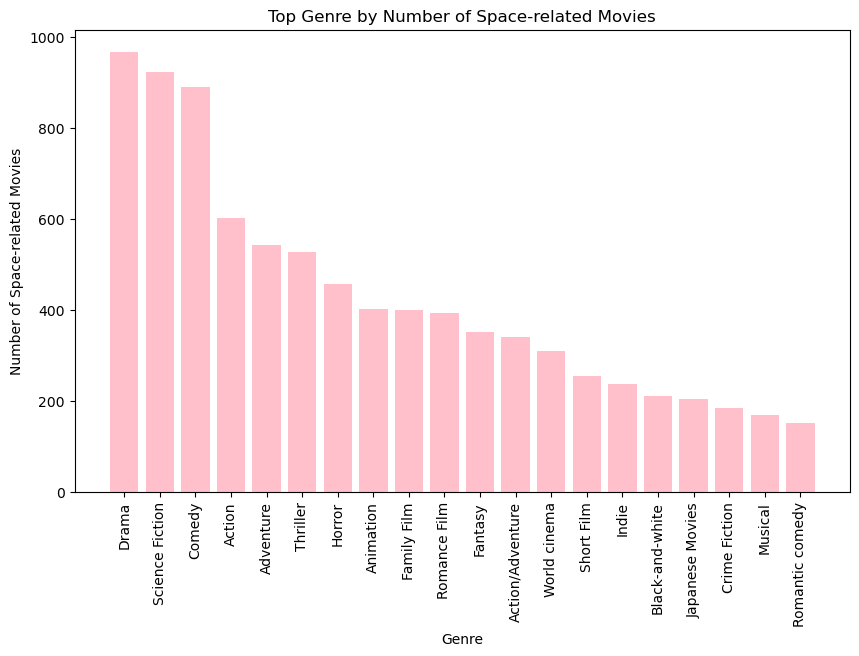

In [167]:
genre, counts = zip(*genre_counts_space)

top_n = 20
genre = genre[:top_n]
counts = counts[:top_n]

plt.figure(figsize=(10, 6))
plt.bar(genre, counts, color='pink')
plt.xlabel("Genre")
plt.ylabel("Number of Space-related Movies")
plt.title("Top Genre by Number of Space-related Movies")
plt.xticks(rotation=90)  # Tourner les noms des pays pour une meilleure lisibilité
plt.show()

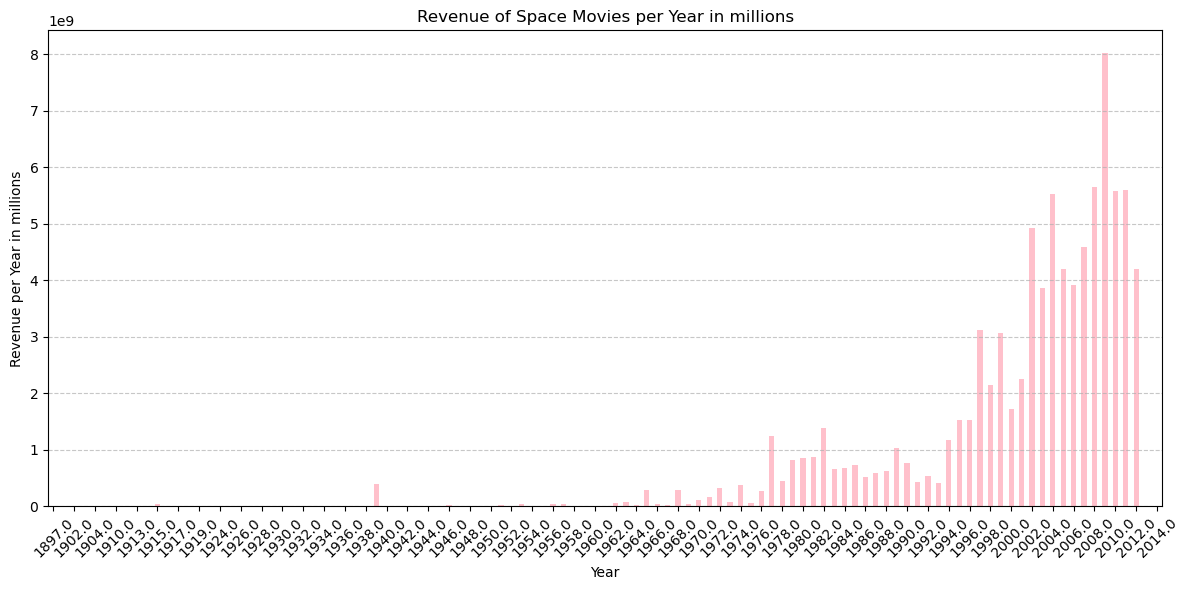

In [168]:
space_revenue_per_year = space_movies.groupby('Year')['Movie box office revenue'].sum()

plt.figure(figsize=(12, 6))
space_revenue_per_year.plot(kind='bar', color='pink')
plt.title('Revenue of Space Movies per Year in millions')
plt.xlabel('Year')
plt.ylabel('Revenue per Year in millions')
plt.xticks(ticks=range(0, len(space_movies_per_year), 2), labels=space_movies_per_year.index[::2], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()